In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
data_2015 = pd.read_csv(r'C:\Users\Ankit\Documents\George Mason Grad\Spring 2024\HAP 725 Case Study\Complications & Deaths + Unplanned Hosp Visit\Readmissions and Deaths - Hospital_2015.csv', engine='python')
data_2016 = pd.read_csv(r'C:\Users\Ankit\Documents\George Mason Grad\Spring 2024\HAP 725 Case Study\Complications & Deaths + Unplanned Hosp Visit\Readmissions and Deaths - Hospital_2016.csv', engine='python')
data_2017 = pd.read_csv(r'C:\Users\Ankit\Documents\George Mason Grad\Spring 2024\HAP 725 Case Study\Complications & Deaths + Unplanned Hosp Visit\Hospital Returns - Hospital_2017.csv', engine='python')
data_2018 = pd.read_csv(r'C:\Users\Ankit\Documents\George Mason Grad\Spring 2024\HAP 725 Case Study\Complications & Deaths + Unplanned Hosp Visit\Unplanned Hospital Visits - Hospital_2018.csv', engine='python')
data_2019 = pd.read_csv(r'C:\Users\Ankit\Documents\George Mason Grad\Spring 2024\HAP 725 Case Study\Complications & Deaths + Unplanned Hosp Visit\Unplanned Hospital Visits - Hospital_2019.csv', engine='python')
data_2020 = pd.read_csv(r'C:\Users\Ankit\Documents\George Mason Grad\Spring 2024\HAP 725 Case Study\Complications & Deaths + Unplanned Hosp Visit\Unplanned Hospital Visits - Hospital_2020.csv', engine='python')
data_2021 = pd.read_csv(r'C:\Users\Ankit\Documents\George Mason Grad\Spring 2024\HAP 725 Case Study\Complications & Deaths + Unplanned Hosp Visit\Unplanned_Hospital_Visits-Hospital_2021.csv', engine='python')
data_2022 = pd.read_csv(r'C:\Users\Ankit\Documents\George Mason Grad\Spring 2024\HAP 725 Case Study\Complications & Deaths + Unplanned Hosp Visit\Unplanned_Hospital_Visits-Hospital_2022.csv', engine='python')
data_2023 = pd.read_csv(r'C:\Users\Ankit\Documents\George Mason Grad\Spring 2024\HAP 725 Case Study\Complications & Deaths + Unplanned Hosp Visit\Unplanned_Hospital_Visits-Hospital_2023.csv', engine='python')
data_2018.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Hospital return days for heart attack patients,EDAC_30_AMI,Average days per 100 discharges,798,-5.9,-15.9,4.8,NaN,7/1/2014,6/30/2017
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Hospital return days for heart failure patients,EDAC_30_HF,More days than average per 100 discharges,1060,17.1,3.4,31.7,NaN,7/1/2014,6/30/2017
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Hospital return days for pneumonia patients,EDAC_30_PN,Average days per 100 discharges,603,8.4,-5.9,24.4,NaN,7/1/2014,6/30/2017
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of unplanned hospital visits after colono...,OP-32,No Different than the National Rate,255,14.8,10.2,21,NaN,1/1/2016,12/31/2016
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Readm...,READM_30_AMI,No Different than the National Rate,798,15.9,13.8,18.2,NaN,7/1/2014,6/30/2017


In [5]:
data_2015_filtered = pd.DataFrame(data_2015, columns = ['Provider ID', 'Hospital Name', 'City', 'Measure ID', 'Score', 'Measure Start Date', 'Measure End Date'])
data_2015_filtered = data_2015_filtered[data_2015_filtered['Measure ID'].isin(['READM_30_AMI'])]

data_2016_filtered = pd.DataFrame(data_2016, columns = ['Provider ID', 'Hospital Name', 'City', 'Measure ID', 'Score', 'Measure Start Date', 'Measure End Date'])
data_2016_filtered = data_2016_filtered[data_2016_filtered['Measure ID'].isin(['READM_30_AMI'])]

data_2017_filtered = pd.DataFrame(data_2017, columns = ['Provider ID', 'Hospital Name', 'City', 'Measure ID', 'Score', 'Measure Start Date', 'Measure End Date'])
data_2017_filtered = data_2017_filtered[data_2017_filtered['Measure ID'].isin(['READM_30_AMI'])]

data_2018_filtered = pd.DataFrame(data_2018, columns = ['Provider ID', 'Hospital Name', 'City', 'Measure ID', 'Score', 'Measure Start Date', 'Measure End Date'])
data_2018_filtered = data_2018_filtered[data_2018_filtered['Measure ID'].isin(['READM_30_AMI'])]

data_2019_filtered = pd.DataFrame(data_2019, columns = ['Facility ID', 'Facility Name', 'City', 'Measure ID', 'Score', 'Start Date', 'End Date'])
data_2019_filtered = data_2019_filtered[data_2019_filtered['Measure ID'].isin(['READM_30_AMI'])]

data_2020_filtered = pd.DataFrame(data_2020, columns = ['Facility ID', 'Facility Name', 'City', 'Measure ID', 'Score', 'Start Date', 'End Date'])
data_2020_filtered = data_2020_filtered[data_2020_filtered['Measure ID'].isin(['READM_30_AMI'])]

data_2021_filtered = pd.DataFrame(data_2021, columns = ['Facility ID', 'Facility Name', 'City', 'Measure ID', 'Score', 'Start Date', 'End Date'])
data_2021_filtered = data_2021_filtered[data_2021_filtered['Measure ID'].isin(['READM_30_AMI'])]

data_2022_filtered = pd.DataFrame(data_2022, columns = ['Facility ID', 'Facility Name', 'City', 'Measure ID', 'Score', 'Start Date', 'End Date'])
data_2022_filtered = data_2022_filtered[data_2022_filtered['Measure ID'].isin(['READM_30_AMI'])]

data_2023_filtered = pd.DataFrame(data_2023, columns = ['Facility ID', 'Facility Name', 'City', 'Measure ID', 'Score', 'Start Date', 'End Date'])
data_2023_filtered = data_2023_filtered[data_2023_filtered['Measure ID'].isin(['READM_30_AMI'])]

data_2023_filtered.head()

,Facility ID,Facility Name,City,Measure ID,Score,Start Date
7,010001,SOUTHEAST HEALTH MEDICAL CENTER,NaN,READM_30_AMI,13,07/01/2019
21,010005,MARSHALL MEDICAL CENTERS,NaN,READM_30_AMI,Not Available,07/01/2019
35,010006,NORTH ALABAMA MEDICAL CENTER,NaN,READM_30_AMI,14.5,07/01/2019
49,010007,MIZELL MEMORIAL HOSPITAL,NaN,READM_30_AMI,Not Available,07/01/2019
63,010008,CRENSHAW COMMUNITY HOSPITAL,NaN,READM_30_AMI,Not Available,07/01/2019


In [6]:
data_2015_filtered['Score'] = pd.to_numeric(data_2015_filtered['Score'], errors='coerce')
data_2015_filtered = data_2015_filtered.replace(np.nan, 0, regex=True)

data_2016_filtered['Score'] = pd.to_numeric(data_2016_filtered['Score'], errors='coerce')
data_2016_filtered = data_2016_filtered.replace(np.nan, 0, regex=True)

data_2017_filtered['Score'] = pd.to_numeric(data_2017_filtered['Score'], errors='coerce')
data_2017_filtered = data_2017_filtered.replace(np.nan, 0, regex=True)

data_2018_filtered['Score'] = pd.to_numeric(data_2018_filtered['Score'], errors='coerce')
data_2018_filtered = data_2018_filtered.replace(np.nan, 0, regex=True)

data_2019_filtered['Score'] = pd.to_numeric(data_2019_filtered['Score'], errors='coerce')
data_2019_filtered = data_2019_filtered.replace(np.nan, 0, regex=True)

data_2020_filtered['Score'] = pd.to_numeric(data_2020_filtered['Score'], errors='coerce')
data_2020_filtered = data_2020_filtered.replace(np.nan, 0, regex=True)

data_2021_filtered['Score'] = pd.to_numeric(data_2021_filtered['Score'], errors='coerce')
data_2021_filtered = data_2021_filtered.replace(np.nan, 0, regex=True)

data_2022_filtered['Score'] = pd.to_numeric(data_2022_filtered['Score'], errors='coerce')
data_2022_filtered = data_2022_filtered.replace(np.nan, 0, regex=True)

data_2023_filtered['Score'] = pd.to_numeric(data_2023_filtered['Score'], errors='coerce')
data_2023_filtered = data_2023_filtered.replace(np.nan, 0, regex=True)

In [7]:
Hosp = ['SENTARA NORFOLK GENERAL HOSPITAL', 'BON SECOURS DEPAUL MEDICAL CENTER', 'SENTARA LEIGH HOSPITAL', 'LEWISGALE MEDICAL CENTER']

city = ['NORFOLK', 'SALEM']

data_2015_filtered2 = pd.DataFrame(data_2015_filtered[(data_2015_filtered['Hospital Name'].isin(Hosp))])
data_2015_filtered2 = data_2015_filtered2[(data_2015_filtered2['City'].isin(city))]
print("\033[1m" + '2015 Filtered Dataset' + "\033[0m")
print(data_2015_filtered2)

data_2016_filtered2 = pd.DataFrame(data_2016_filtered[(data_2016_filtered['Hospital Name'].isin(Hosp))])
data_2016_filtered2 = data_2016_filtered2[(data_2016_filtered2['City'].isin(city))]
print("\033[1m" + '2016 Filtered Dataset' + "\033[0m")
print(data_2016_filtered2)

data_2017_filtered2 = pd.DataFrame(data_2017_filtered[(data_2017_filtered['Hospital Name'].isin(Hosp))])
data_2017_filtered2 = data_2017_filtered2[(data_2017_filtered2['City'].isin(city))]
print("\033[1m" + '2017 Filtered Dataset' + "\033[0m")
print(data_2017_filtered2)

data_2018_filtered2 = pd.DataFrame(data_2018_filtered[(data_2018_filtered['Hospital Name'].isin(Hosp))])
data_2018_filtered2 = data_2018_filtered2[(data_2018_filtered2['City'].isin(city))]
print("\033[1m" + '2018 Filtered Dataset' + "\033[0m")
print(data_2018_filtered2)

data_2019_filtered2 = pd.DataFrame(data_2019_filtered[(data_2019_filtered['Facility Name'].isin(Hosp))])
data_2019_filtered2 = data_2019_filtered2[(data_2019_filtered2['City'].isin(city))]
print("\033[1m" + '2019 Filtered Dataset' + "\033[0m")
print(data_2019_filtered2)

data_2020_filtered2 = pd.DataFrame(data_2020_filtered[(data_2020_filtered['Facility Name'].isin(Hosp))])
data_2020_filtered2 = data_2020_filtered2[(data_2020_filtered2['City'].isin(city))]
print("\033[1m" + '2020 Filtered Dataset' + "\033[0m")
print(data_2020_filtered2)

data_2021_filtered2 = pd.DataFrame(data_2021_filtered[(data_2021_filtered['Facility Name'].isin(Hosp))])
data_2021_filtered2 = data_2021_filtered2[(data_2021_filtered2['City'].isin(city))]
print("\033[1m" + '2021 Filtered Dataset' + "\033[0m")
print(data_2021_filtered2)

data_2022_filtered2 = pd.DataFrame(data_2022_filtered[(data_2022_filtered['Facility Name'].isin(Hosp))])
data_2022_filtered2 = data_2022_filtered2[(data_2022_filtered2['City'].isin(city))]
print("\033[1m" + '2022 Filtered Dataset' + "\033[0m")
print(data_2022_filtered2)

data_2023_filtered2 = pd.DataFrame(data_2023_filtered[(data_2023_filtered['Facility Name'].isin(Hosp))])
data_2023_filtered2 = data_2023_filtered2[(data_2023_filtered2['City'].isin(city))]
print("\033[1m" + '2023 Filtered Dataset' + "\033[0m")
print(data_2023_filtered2)

2015 Filtered Dataset
      Provider ID                      Hospital Name     City    Measure ID  \
60682      490007   SENTARA NORFOLK GENERAL HOSPITAL  NORFOLK  READM_30_AMI   
60710      490011  BON SECOURS DEPAUL MEDICAL CENTER  NORFOLK  READM_30_AMI   
60990      490046             SENTARA LEIGH HOSPITAL  NORFOLK  READM_30_AMI   
61004      490048           LEWISGALE MEDICAL CENTER    SALEM  READM_30_AMI   

       Score Measure Start Date Measure End Date  
60682   15.4         07/01/2011       06/30/2014  
60710   15.6         07/01/2011       06/30/2014  
60990   16.9         07/01/2011       06/30/2014  
61004   20.3         07/01/2011       06/30/2014  
2016 Filtered Dataset
       Provider ID                      Hospital Name     City    Measure ID  \
61074       490007   SENTARA NORFOLK GENERAL HOSPITAL  NORFOLK  READM_30_AMI   
61102       490011  BON SECOURS DEPAUL MEDICAL CENTER  NORFOLK  READM_30_AMI   
61410       490046             SENTARA LEIGH HOSPITAL  NORFOLK  R

In [8]:
print(data_2015_filtered2.shape)
print(data_2016_filtered2.shape)
print(data_2017_filtered2.shape)
print(data_2018_filtered2.shape)
print(data_2019_filtered2.shape)
print(data_2020_filtered2.shape)
print(data_2021_filtered2.shape)
print(data_2022_filtered2.shape)

(4, 7)
(4, 7)
(4, 7)
(4, 7)
(4, 7)
(4, 7)
(4, 7)
(3, 7)


In [9]:
hosp = ['SENTARA NORFOLK GENERAL HOSPITAL']

data_2015_Nor = pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'].isin(hosp))])
avgscore_Nor_2015 = data_2015_Nor['Score'].mean()

data_2016_Nor = pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Hospital Name'].isin(hosp))])
avgscore_Nor_2016 = data_2016_Nor['Score'].mean()

data_2017_Nor = pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Hospital Name'].isin(hosp))])
avgscore_Nor_2017 = data_2017_Nor['Score'].mean()

data_2018_Nor = pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Hospital Name'].isin(hosp))])
avgscore_Nor_2018 = data_2018_Nor['Score'].mean()

data_2019_Nor = pd.DataFrame(data_2019_filtered2[(data_2019_filtered2['Facility Name'].isin(hosp))])
avgscore_Nor_2019 = data_2019_Nor['Score'].mean()

data_2020_Nor = pd.DataFrame(data_2020_filtered2[(data_2020_filtered2['Facility Name'].isin(hosp))])
avgscore_Nor_2020 = data_2020_Nor['Score'].mean()

data_2021_Nor = pd.DataFrame(data_2021_filtered2[(data_2021_filtered2['Facility Name'].isin(hosp))])
avgscore_Nor_2021 = data_2021_Nor['Score'].mean()

data_2022_Nor = pd.DataFrame(data_2022_filtered2[(data_2022_filtered2['Facility Name'].isin(hosp))])
avgscore_Nor_2022 = data_2022_Nor['Score'].mean()

print(avgscore_Nor_2015)
print(avgscore_Nor_2016)
print(avgscore_Nor_2017)
print(avgscore_Nor_2018)
print(avgscore_Nor_2019)
print(avgscore_Nor_2020)
print(avgscore_Nor_2021)
print(avgscore_Nor_2022)

15.4
15.5
15.8
14.7
14.4
14.4
14.9
13.8


In [10]:
data_2015_Comp = pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'] !='SENTARA NORFOLK GENERAL HOSPITAL')])
avgscore_Comp_2015 = data_2015_Comp['Score'].mean()

data_2016_Comp = pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Hospital Name'] !='SENTARA NORFOLK GENERAL HOSPITAL')])
avgscore_Comp_2016 = data_2016_Comp['Score'].mean()

data_2017_Comp = pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Hospital Name'] !='SENTARA NORFOLK GENERAL HOSPITAL')])
avgscore_Comp_2017 = data_2017_Comp['Score'].mean()

data_2018_Comp = pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Hospital Name'] !='SENTARA NORFOLK GENERAL HOSPITAL')])
avgscore_Comp_2018 = data_2018_Comp['Score'].mean()

data_2019_Comp = pd.DataFrame(data_2019_filtered2[(data_2019_filtered2['Facility Name'] !='SENTARA NORFOLK GENERAL HOSPITAL')])
avgscore_Comp_2019 = data_2019_Comp['Score'].mean()

data_2020_Comp = pd.DataFrame(data_2020_filtered2[(data_2020_filtered2['Facility Name'] !='SENTARA NORFOLK GENERAL HOSPITAL')])
avgscore_Comp_2020 = data_2020_Comp['Score'].mean()

data_2021_Comp = pd.DataFrame(data_2021_filtered2[(data_2021_filtered2['Facility Name'] !='SENTARA NORFOLK GENERAL HOSPITAL')])
avgscore_Comp_2021 = data_2021_Comp['Score'].mean()

data_2022_Comp = pd.DataFrame(data_2022_filtered2[(data_2022_filtered2['Facility Name'] !='SENTARA NORFOLK GENERAL HOSPITAL')])
avgscore_Comp_2022 = data_2022_Comp['Score'].mean()

print(avgscore_Comp_2015)
print(avgscore_Comp_2016)
print(avgscore_Comp_2017)
print(avgscore_Comp_2018)
print(avgscore_Comp_2019)
print(avgscore_Comp_2020)
print(avgscore_Comp_2021)
print(avgscore_Comp_2022)

17.599999999999998
17.166666666666668
16.666666666666668
16.033333333333335
15.733333333333333
15.733333333333333
16.233333333333334
16.2


In [11]:
df_all = [data_2015_filtered2['Score'], data_2016_filtered2['Score'], data_2017_filtered2['Score'], data_2018_filtered2['Score'], data_2019_filtered2['Score'], data_2020_filtered2['Score'], data_2021_filtered2['Score'], data_2022_filtered2['Score']]

headers = ['AllScore2015', 'AllScore2016', 'AllScore2017', 'AllScore2018', 'AllScore2019', 'AllScore2020', 'AllScore2021', 'AllScore2022']

df1_all = pd.concat(df_all, axis=1, keys=headers)

df1_all.head()

,AllScore2015,AllScore2016,AllScore2017,AllScore2018,AllScore2019,AllScore2020,AllScore2021,AllScore2022
60682,15.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60710,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60990,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61004,20.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61074,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Grand Avg
avgall = df1_all.stack().mean()
avgall

16.025806451612905

In [13]:
stdall = df1_all.stack().std()
stdall

1.4137344734038013

In [14]:
df = [data_2015_Comp['Score'], data_2016_Comp['Score'], data_2017_Comp['Score'], data_2018_Comp['Score'], data_2019_Comp['Score'], data_2020_Comp['Score'], data_2021_Comp['Score'], data_2022_Comp['Score']]

headers = ['Score2015', 'Score2016', 'Score2017', 'Score2018', 'Score2019', 'Score2020', 'Score2021', 'Score2022']

df1 = pd.concat(df_all, axis=1, keys=headers)

df1.head()

,Score2015,Score2016,Score2017,Score2018,Score2019,Score2020,Score2021,Score2022
60682,15.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60710,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60990,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61004,20.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61074,NaN,15.5,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
avg2015 = df1['Score2015'].mean()
avg2016 = df1['Score2016'].mean()
avg2017 = df1['Score2017'].mean()
avg2018 = df1['Score2018'].mean()
avg2019 = df1['Score2019'].mean()
avg2020 = df1['Score2020'].mean()
avg2021 = df1['Score2021'].mean()
avg2022 = df1['Score2022'].mean()

print(avg2015)
print(avg2016)
print(avg2017)
print(avg2018)
print(avg2019)
print(avg2020)
print(avg2021)
print(avg2022)

17.05
16.75
16.450000000000003
15.7
15.399999999999999
15.399999999999999
15.899999999999999
15.4


In [16]:
n_2015=int(df1['Score2015'].count())
n_2016=int(df1['Score2016'].count())
n_2017=int(df1['Score2017'].count())
n_2018=int(df1['Score2018'].count())
n_2019=int(df1['Score2019'].count())
n_2020=int(df1['Score2020'].count())
n_2021=int(df1['Score2021'].count())
n_2022=4

print(n_2015)
print(n_2016)
print(n_2017)
print(n_2018)
print(n_2019)
print(n_2020)
print(n_2021)
print(n_2022)

4
4
4
4
4
4
4
4


In [17]:
zstat = 1.96

In [18]:
std2015 = stdall/(math.sqrt(n_2015))
std2016 = stdall/(math.sqrt(n_2016))
std2017 = stdall/(math.sqrt(n_2017))
std2018 = stdall/(math.sqrt(n_2018))
std2019 = stdall/(math.sqrt(n_2019))
std2020 = stdall/(math.sqrt(n_2020))
std2021 = stdall/(math.sqrt(n_2021))
std2022 = stdall/(math.sqrt(n_2022))

print(std2015)
print(std2016)
print(std2017)
print(std2018)
print(std2019)
print(std2020)
print(std2021)
print(std2022)

0.7068672367019007
0.7068672367019007
0.7068672367019007
0.7068672367019007
0.7068672367019007
0.7068672367019007
0.7068672367019007
0.7068672367019007


In [19]:
df3 = [['2015', avgscore_Nor_2015, avg2015, std2015, avgall, zstat],
      ['2016', avgscore_Nor_2016, avg2016, std2016, avgall, zstat],
      ['2017', avgscore_Nor_2017, avg2017, std2017, avgall, zstat],
      ['2018', avgscore_Nor_2018, avg2018, std2018, avgall, zstat],
      ['2019', avgscore_Nor_2019, avg2019, std2019, avgall, zstat],
      ['2020', avgscore_Nor_2020, avg2020, std2020, avgall, zstat],
      ['2021', avgscore_Nor_2021, avg2021, std2021, avgall, zstat],
      ['2022', avgscore_Nor_2022, avg2022, std2022, avgall, zstat]]

df3

[['2015', 15.4, 17.05, 0.7068672367019007, 16.025806451612905, 1.96],
 ['2016', 15.5, 16.75, 0.7068672367019007, 16.025806451612905, 1.96],
 ['2017',
  15.8,
  16.450000000000003,
  0.7068672367019007,
  16.025806451612905,
  1.96],
 ['2018', 14.7, 15.7, 0.7068672367019007, 16.025806451612905, 1.96],
 ['2019',
  14.4,
  15.399999999999999,
  0.7068672367019007,
  16.025806451612905,
  1.96],
 ['2020',
  14.4,
  15.399999999999999,
  0.7068672367019007,
  16.025806451612905,
  1.96],
 ['2021',
  14.9,
  15.899999999999999,
  0.7068672367019007,
  16.025806451612905,
  1.96],
 ['2022', 13.8, 15.4, 0.7068672367019007, 16.025806451612905, 1.96]]

In [20]:
df4 = pd.DataFrame(df3, columns = ['Year', 'SENTARA NORFOLK GENERAL HOSPITAL', 'Avg Readmission Rate Comp Hosp', 'StdPerTime', 'Avg Readmission Rate All', 'zstat'])
df4

,Year,SENTARA NORFOLK GENERAL HOSPITAL,Avg Readmission Rate Comp Hosp,StdPerTime,Avg Readmission Rate All,zstat
0,2015,15.4,17.05,0.706867,16.025806,1.96
1,2016,15.5,16.75,0.706867,16.025806,1.96
2,2017,15.8,16.45,0.706867,16.025806,1.96
3,2018,14.7,15.70,0.706867,16.025806,1.96
4,2019,14.4,15.40,0.706867,16.025806,1.96
5,2020,14.4,15.40,0.706867,16.025806,1.96
6,2021,14.9,15.90,0.706867,16.025806,1.96
7,2022,13.8,15.40,0.706867,16.025806,1.96


In [21]:
df4['UCL for Competitor Hospitals'] = df4['Avg Readmission Rate All'] + df4['zstat']*df4['StdPerTime']
df4['LCL for Competitor Hospitals'] = df4['Avg Readmission Rate All'] - df4['zstat']*df4['StdPerTime']
df4

,Year,SENTARA NORFOLK GENERAL HOSPITAL,Avg Readmission Rate Comp Hosp,StdPerTime,Avg Readmission Rate All,zstat,UCL for Competitor Hospitals,LCL for Competitor Hospitals
0,2015,15.4,17.05,0.706867,16.025806,1.96,17.411266,14.640347
1,2016,15.5,16.75,0.706867,16.025806,1.96,17.411266,14.640347
2,2017,15.8,16.45,0.706867,16.025806,1.96,17.411266,14.640347
3,2018,14.7,15.70,0.706867,16.025806,1.96,17.411266,14.640347
4,2019,14.4,15.40,0.706867,16.025806,1.96,17.411266,14.640347
5,2020,14.4,15.40,0.706867,16.025806,1.96,17.411266,14.640347
6,2021,14.9,15.90,0.706867,16.025806,1.96,17.411266,14.640347
7,2022,13.8,15.40,0.706867,16.025806,1.96,17.411266,14.640347


Text(0, 0.5, 'Readmission Rate')

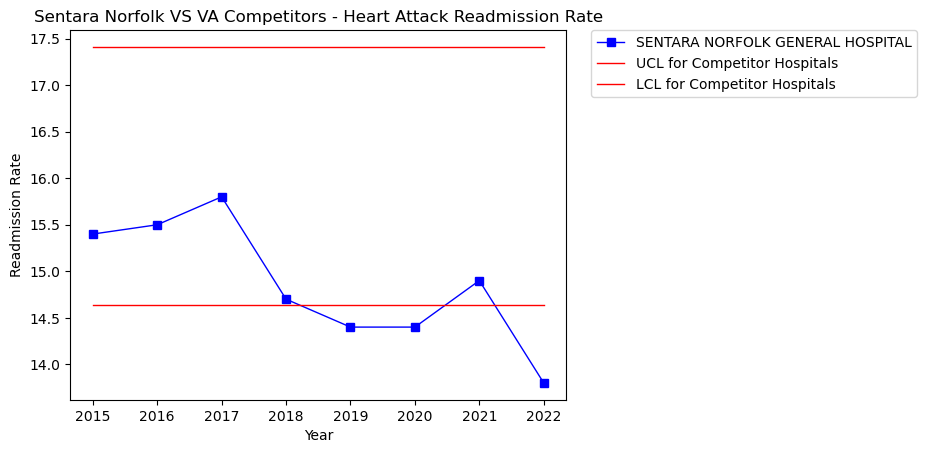

In [23]:
plt.plot('Year', 'SENTARA NORFOLK GENERAL HOSPITAL', data=df4, marker='s', markerfacecolor='blue', linewidth=1, color='blue')
plt.plot('Year', 'UCL for Competitor Hospitals', data=df4, markersize=0, color='red', linewidth=1)
plt.plot('Year', 'LCL for Competitor Hospitals', data=df4, markersize=0, color='red', linewidth=1)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)
plt.title('Sentara Norfolk VS VA Competitors - Heart Attack Readmission Rate')
plt.xlabel('Year')
plt.ylabel('Readmission Rate')